<a href="https://colab.research.google.com/github/parththakkar610/Codsoft/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 3: Iris Flower Detection

In [38]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [39]:
iris_data = pd.read_csv('/content/Iris.csv')

In [40]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
iris_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [42]:
iris_data.shape

(150, 6)

In [43]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [44]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [45]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [46]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Data Visualization

<Axes: >

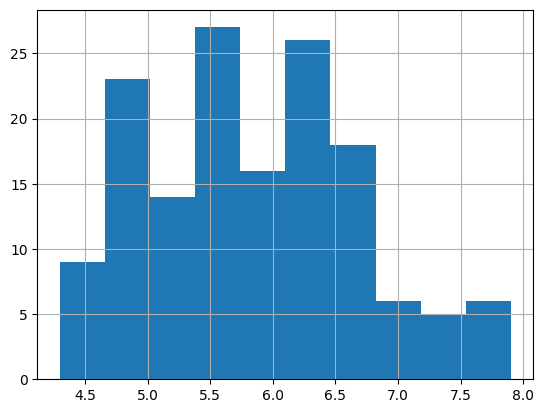

In [47]:
iris_data['SepalLengthCm'].hist()


<Axes: >

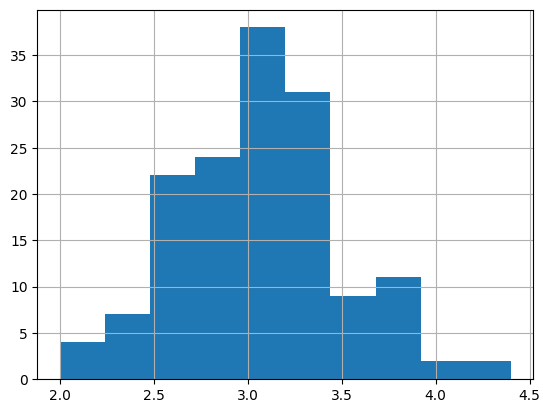

In [48]:
iris_data['SepalWidthCm'].hist()

<Axes: >

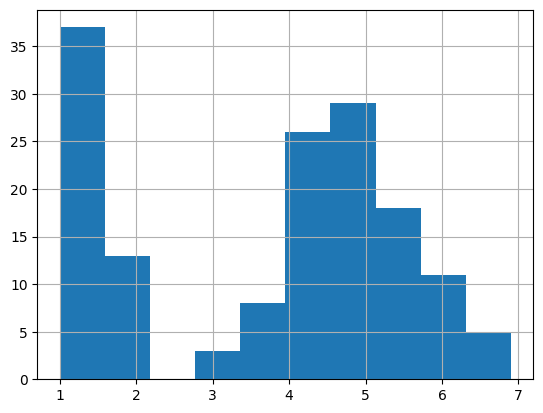

In [49]:
iris_data['PetalLengthCm'].hist()

<Axes: >

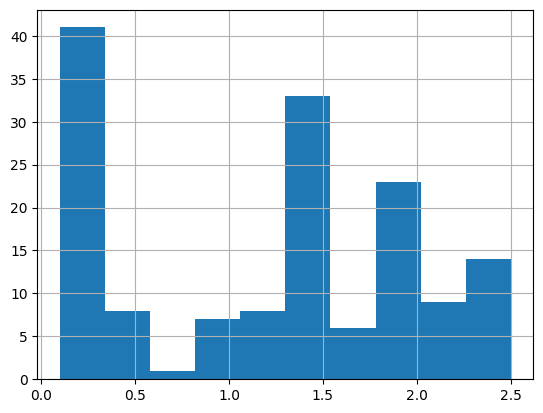

In [50]:
iris_data['PetalWidthCm'].hist()

<ipython-input-51-841b4218a5c5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris_data.corr())


<Axes: >

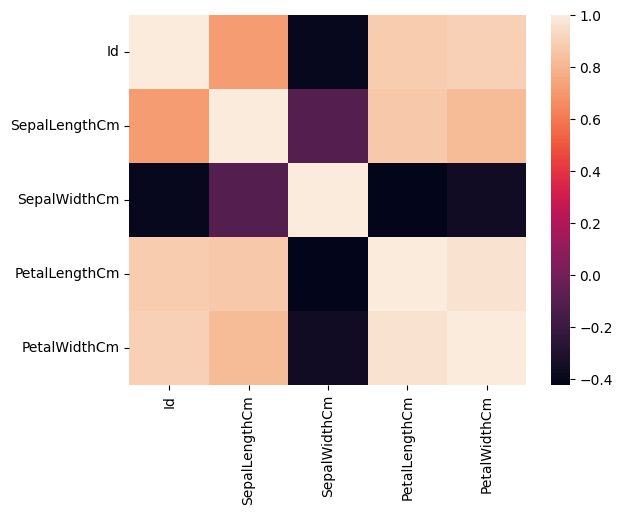

In [51]:
sns.heatmap(iris_data.corr())

In [52]:
# scatter plot
colors = ['red', 'orange', 'blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica' ]

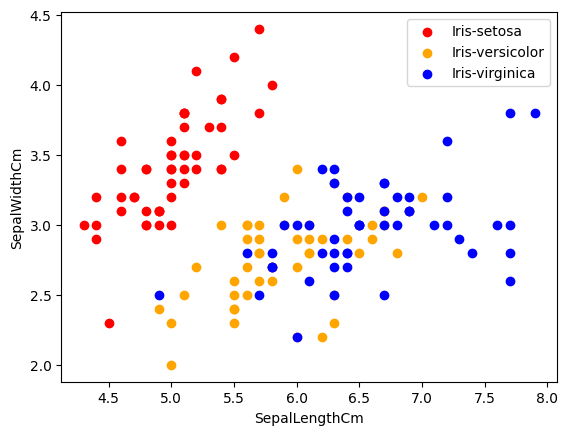

In [53]:
for i in range(3):
  x = iris_data[iris_data['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.legend()

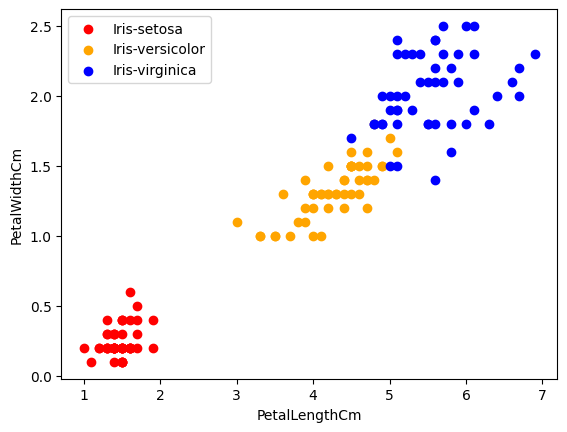

In [54]:
for i in range(3):
  x = iris_data[iris_data['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend()

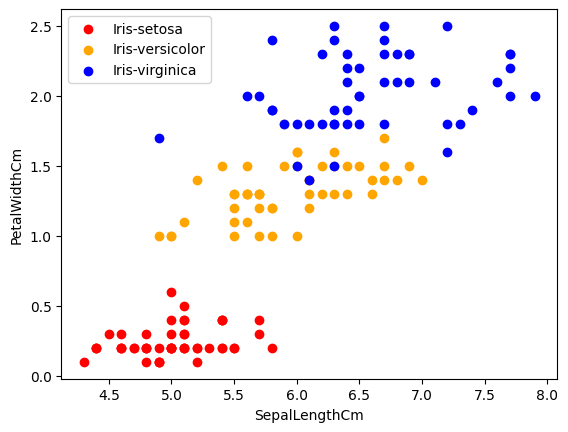

In [55]:
for i in range(3):
  x = iris_data[iris_data['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend()

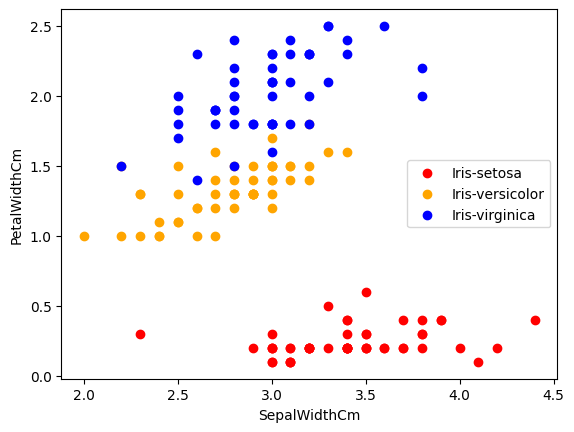

In [56]:
for i in range(3):
  x = iris_data[iris_data['Species'] == species[i]]
  plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("SepalWidthCm")
plt.ylabel("PetalWidthCm")
plt.legend()

In [57]:
iris_data.replace({"Species": {'Iris-setosa':0, 'Iris-versicolor':1,'Iris-virginica':2}}, inplace = True)

In [58]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [59]:
iris_data['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [60]:
X = iris_data.drop(columns =["Species","Id"], axis = 1)
Y = iris_data['Species']

In [61]:
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [62]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2 , random_state = 2)

In [64]:
print(X.shape, X_train.shape, X_test.shape)

(150, 4) (120, 4) (30, 4)


In [65]:
print(X_train)
print(Y_train)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
126            6.2           2.8            4.8           1.8
23             5.1           3.3            1.7           0.5
64             5.6           2.9            3.6           1.3
117            7.7           3.8            6.7           2.2
84             5.4           3.0            4.5           1.5
..             ...           ...            ...           ...
75             6.6           3.0            4.4           1.4
43             5.0           3.5            1.6           0.6
22             4.6           3.6            1.0           0.2
72             6.3           2.5            4.9           1.5
15             5.7           4.4            1.5           0.4

[120 rows x 4 columns]
126    2
23     0
64     1
117    2
84     1
      ..
75     1
43     0
22     0
72     1
15     0
Name: Species, Length: 120, dtype: int64


model Training

In [66]:
model = LogisticRegression()

In [67]:
model.fit(X_train, Y_train)

LogisticRegression()

model Evaluation

In [68]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

print("Accuracy for training data: ", training_data_accuracy)

Accuracy for training data:  0.975


In [69]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print("Accuracy for testing data: ", testing_data_accuracy)

Accuracy for testing data:  0.9666666666666667


In [70]:
Model = DecisionTreeClassifier()

In [71]:
Model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [72]:
X_train_prediction = Model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

print("Accuracy for training data: ", training_data_accuracy)

Accuracy for training data:  1.0


In [73]:
X_test_prediction = Model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print("Accuracy for testing data: ", testing_data_accuracy)

Accuracy for testing data:  0.9333333333333333


Model prediction

In [74]:
input_data = (5.9,3.0,4.2,1.5)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if(prediction[0] == 0):
  print("Iris-setosa")
elif(prediction[0] == 1):
  print("Iris-versicolor")
else:
  print("Iris-virginica")

[1]
Iris-versicolor


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
